In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import surp
from surp import gce_math as gcem

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


Pignatari et al. (2016) reports yields in terms of over production factors (OP), defined as
$$
{\rm OP} = \frac{M_{\rm ej, i}}{M_{\rm ej} Z_{i}^0}
$$
 i.e. the ratio between the mean ejected abundance composition and the initial composition of the star. 
 Since we are interested in net fractional yields, we can calculate these from the overproduction factor as follows
 $$
 Y_{X} = Z_{\rm ini} ({\rm OP} - 1) \frac{M_{\rm ej}}{M_{\rm ini}} = (Z_{\rm ej} - Z_{\rm ini}) \frac{M_{\rm ej}}{M_{\rm ini}}
 $$.
 
Thus from each nu-grid model, we need the OP factor, the initial and ejected mass, and the birth composition.

- P16: 10.26093/cds/vizier.22250024. Table 12. 
- R18 is available at DOI: 10.11570/18.0002

For P16, note that set 1.1 has Z=0.01, set 1.2 has Z=0.02.

In [4]:
path = "/astro/dboyea/source/VICE/vice/yields/agb/pignatari16/raw/"

In [14]:
Zsun = pd.read_csv(path + "gn93.txt", comment="#", names=["element", "epsilon"])

In [19]:
Zsun["Z"] = gcem.eps_to_abundance(Zsun["epsilon"], Zsun["element"].values)

Zsun["Z"] /= sum(Zsun.Z)

In [7]:
import vice

In [20]:
Zsun.set_index("element", inplace=True)

In [23]:
Zsun

,element,epsilon,Z
0,H,12.00,7.079869e-01
1,He,10.99,2.747467e-01
2,Li,3.31,9.952899e-09
3,Be,1.42,1.665023e-10
4,B,2.79,4.682265e-09
...,...,...,...
80,Bi,0.71,7.528279e-10
81,Th,0.09,2.005158e-10
82,U,0.50,5.287128e-10
83,Tc,0.00,6.877091e-11


## P16

In [4]:
p16_stars = pd.read_csv(path + "p16_stars.tsv", sep="\s+", comment="#")
p16_stars.set_index(["mass", "Z"], inplace=True)


In [5]:
p16_ops = pd.read_csv(path + "p16_table12.tsv", sep="\t", comment="#", skiprows=[42, 43])

In [6]:
p16_ops

,Sp,OP1.65,OP2,OP3,OP4,OP5,OP15,OP20,OP25,OP32,OP60,Set
0,H,0.97,0.943,0.926,0.941,0.901,0.978,0.960,0.904,8.14e-01,5.50e-01,1.2
1,He,1.07,1.070,1.110,1.110,1.240,1.050,1.100,1.250,1.48e+00,1.89e+00,1.2
2,C,1.37,3.940,4.840,2.810,1.540,0.758,0.829,0.714,5.39e-01,1.81e+01,1.2
3,N,2.19,2.410,2.860,3.080,3.800,2.350,2.350,3.620,5.70e+00,6.26e+00,1.2
4,O,1.04,1.430,1.580,1.250,0.969,0.947,0.913,0.807,6.30e-01,1.48e+00,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Au,1.00,1.080,1.190,1.050,1.010,1.000,1.000,1.000,,,1.1
156,Hg,1.08,2.120,3.350,1.630,1.170,1.000,1.000,1.000,,,1.1
157,Tl,1.06,2.110,3.490,1.570,1.170,1.000,1.000,1.000,,,1.1
158,Pb,1.03,1.710,3.810,2.020,1.380,1.000,1.000,1.000,,,1.1


In [22]:
p16_ops["Z"] = np.where(p16_ops.Set == 1.2, 0.02, 0.01)

NameError: name 'p16_ops' is not defined

In [11]:
p16_ops = p16_ops.melt(id_vars=["Sp", "Z"], value_vars=["OP1.65", "OP2", "OP3", "OP4", "OP5",], var_name="Mname", value_name="OP")


NameError: name 'p16_ops' is not defined

In [16]:
p16_ops["mass"] = p16_ops.Mname.str.extract(r"(\d?\.?\d+)")
p16_ops["mass"] = pd.to_numeric(p16_ops.mass)

In [17]:
p16 = p16_ops[p16_ops.mass < 8]

In [18]:
m_rem = [p16_stars.loc[r.mass, r.Z][0] for i, r in p16.iterrows()]

/tmp/ipykernel_3246073/1963370917.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m_rem = [p16_stars.loc[r.mass, r.Z][0] for i, r in p16.iterrows()]


In [19]:
p16["M_rem"] = m_rem

In [21]:
p16["element"] = p16.Sp.str.strip()

In [23]:
Z0 = [Zsun.loc[r.element].Z for i, r in p16.iterrows()]

In [24]:
p16["Zini"] = Z0 * p16.Z / 0.0179

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (800,) + inhomogeneous part.

In [ ]:
p16["yields"] = p16.Zini * (p16.OP - 1) * (1 - p16.M_rem/p16.mass)

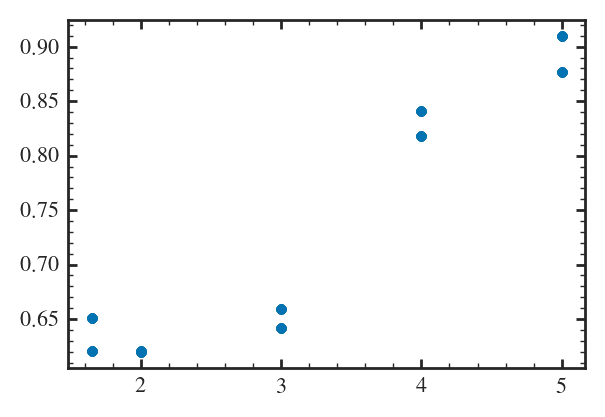

In [25]:
plt.scatter(p16.mass, p16.M_rem)

## B19/21

In [28]:
b19 = pd.read_csv(path + "/B19.txt", sep="\s+", skiprows=0, index_col=0)
b21 = pd.read_csv(path + "/B21.txt", sep="\s+", skiprows=2, index_col=0)

In [29]:
b19_ele = pd.DataFrame(columns=b19.columns)
for idx, row in b19.iterrows():
    ele, _ = idx.split("-")
    if ele in b19_ele.index:
        b19_ele.loc[ele] += row
    else:
        b19_ele = pd.concat([b19_ele, pd.DataFrame(row.to_dict(), index=[ele])])

/tmp/ipykernel_3247149/2141356617.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b19_ele = pd.concat([b19_ele, pd.DataFrame(row.to_dict(), index=[ele])])


In [30]:
b21_ele = pd.DataFrame(columns=b21.columns)
for idx, row in b21.iterrows():
    ele, _ = idx.split("-")
    if ele in b21_ele.index:
        b21_ele.loc[ele] += row
    else:
        b21_ele = pd.concat([b21_ele, pd.DataFrame(row.to_dict(), index=[ele])])

/tmp/ipykernel_3247149/4003872714.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b21_ele = pd.concat([b21_ele, pd.DataFrame(row.to_dict(), index=[ele])])


## R 18

In [24]:
elements = "H, He, Li, B, C, N, O, F, Ne, Na, Mg, Al, Si, P, Pb, S, Cl, Ar, K, Ca, Sc, Ti, V, Cr, Mn, Fe, Co, Ni, Cu, Zn, Ga, Ge, As, Se, Br, Kr, Rb, Sr, Y, Zr, Nb, Mo, Ru, Rh, Pd, Ag, Cd, In, Sn, Sb, Te, I, Xe, Cs, Ba, La, Ce, Pr, Nd, Sm, Eu, Gd, Tb, Dy, Ho, Er, Tm, Yb, Lu, Hf, Ta, W, Re, Os, Ir, Pt, Au, Hg, Tl, Bi".split(", ")

In [38]:
raw = {}
yields = {}

for ele in elements:
    raw[ele] = pd.DataFrame()
    yields[ele] = pd.DataFrame()

a = pd.DataFrame()
with open(path + "/element_yield_table_MESAonly_fryer12_delay_total.txt") as file:
    skip = 6
    M = None
    M_ej = None
    for line in file:
        if skip > 0:
            skip -= 1
            continue
            
        if line[:7] == "H Table":
            s1, s2 = line[10:].split(",")
            M = float(s1[2:])
            Z = float(s2[2:-2])
            skip = 1
            continue
            
        if line[:8] == "H Mfinal":
            M_rem = float(line[10:])
            M_ej = M - M_rem
            skip = 1
            continue
            
        if M_ej is None:
            continue
        
        _, ele, y, x0, _ = line.split("&")

        y = float(y)
        x0 = float(x0)
        xf = y/M_ej
        y_net_fractional = (xf - x0) * M_ej/M
        ele = ele.strip()
        
        row = pd.DataFrame({"mass":M, "M_rem":M_rem, "Z":Z, "y":y, "x0": x0}, index=[0])
        raw[ele] = pd.concat([raw[ele], row], ignore_index=True)
        
        row = pd.DataFrame({"mass":M, "M_rem":M_rem, "Z":Z, "y":y, "yield": y_net_fractional, "x0": x0, "element": ele}, index=[0])
        a = pd.concat([a, row], ignore_index=True)

        
        row = pd.DataFrame({"mass":M, "Z":Z, "y":y_net_fractional}, index=[0])
        yields[ele] = pd.concat([yields[ele], row], ignore_index=True)

In [39]:

for ele in elements:
    raw[ele].set_index(["mass", "Z"], inplace=True)

In [48]:
# update the relevant models with B19 and B21
for ele in elements:
    b19r = b19_ele.loc[ele]
    b21r = b21_ele.loc[ele]
    for M, Z, b, key in [
        (2, 0.01, b19r, "m2z1m2"),
        (3, 0.01, b19r, "m3z1m2"),
        (2, 0.02, b19r, "m2z2m2"),
        (3, 0.02, b19r, "m3z2m2"),
        (2, 0.001, b21r, "m2z1m3-bigpoc"),
        (3, 0.001, b21r, "m3z1m3-bigpoc")
    ]:
        df = raw[ele]
        y = b[key]
        raw[ele].loc[(M, Z), "y"] = y

/tmp/ipykernel_3247149/1994827397.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw[ele].loc[(M, Z), "y"] = y
/tmp/ipykernel_3247149/1994827397.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw[ele].loc[(M, Z), "y"] = y
/tmp/ipykernel_3247149/1994827397.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw[ele].loc[(M, Z), "y"] = y
/tmp/ipykernel_3247149/1994827397.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw[ele].loc[(M, Z), "y"] = y
/tmp/ipykernel_3247149/1994827397.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw[ele].loc[(M, Z), "y"] = y
/tmp/ipykernel_3247149/1994827397.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw[ele].loc[(M, Z), "y"] = y
/tmp/ipykernel_3247149/1994827397.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw[ele].loc[(M

In [49]:
yields_old = {ele: df.copy() for ele, df in yields.items()}

In [50]:
for ele in elements:
    df = raw[ele]
    df["M"] = [a[0] for a in df.index]
    df["Z"] = [a[1] for a in df.index]
    M_ej = df.M - df.M_rem
    x_ej = df.y/M_ej
    y_net_frac = (x_ej - df.x0) * M_ej/df.M
    yields[ele]["yields"] = y_net_frac.values
    yields[ele] = yields[ele]

In [51]:
yields["C"]

,mass,Z,y,yields
0,1.00,0.0200,-0.000172,-0.000172
1,1.65,0.0200,0.000780,0.000780
2,2.00,0.0200,0.007079,0.002570
3,3.00,0.0200,0.010462,0.008695
4,4.00,0.0200,0.004985,0.004985
...,...,...,...,...
56,7.00,0.0001,0.000246,0.000246
57,12.00,0.0001,0.010206,0.010206
58,15.00,0.0001,0.010962,0.010962
59,20.00,0.0001,0.009769,0.009769


In [52]:
cd ~/source/VICE/vice/yields/agb/pignatari16/

/arc7/home/dboyea/source/VICE/vice/yields/agb/pignatari16


/astro/dboyea/.local/lib/python3.11/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/astro/dboyea/.local/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [53]:
yields["H"]

,mass,Z,y,yields
0,1.00,0.0200,-0.008889,-0.008889
1,1.65,0.0200,-0.012663,-0.012663
2,2.00,0.0200,-0.025700,-0.132914
3,3.00,0.0200,-0.040976,-0.049178
4,4.00,0.0200,-0.033271,-0.033271
...,...,...,...,...
56,7.00,0.0001,-0.111717,-0.111717
57,12.00,0.0001,-0.192544,-0.192544
58,15.00,0.0001,-0.234049,-0.234049
59,20.00,0.0001,-0.246453,-0.246453


In [56]:
for ele, table in yields.items():
    filename = "%s.dat" % (ele.lower())
    df = table[table.mass < 8].sort_values(by=["mass", "Z"])
    df[["mass", "Z", "y"]].to_csv(filename, sep="\t", index=False, header=False)

In [216]:
a["OP"] = a.y / ((a.mass -a.M_rem) * a.x0)
a["y2"] = (a.OP - 1) * a.x0 * (a.mass - a.M_rem) / a.mass
p16["element"] = p16.Sp

In [217]:

d1 = p16.set_index(["element", "Z", "mass"])
d2 = a.set_index(["element", "Z", "mass"])

In [218]:
raw["He"]

,,M_rem,y,x0,M,Z
mass,Z,,,,,
1.00,0.0200,0.5601,0.1292,0.2735,1.00,0.0200
1.65,0.0200,0.6510,0.2911,0.2735,1.65,0.0200
2.00,0.0200,0.6201,0.4056,0.2735,2.00,0.0200
3.00,0.0200,0.6420,0.7150,0.2735,3.00,0.0200
4.00,0.0200,0.8180,0.9663,0.2735,4.00,0.0200
5.00,0.0200,0.8768,1.3970,0.2735,5.00,0.0200
6.00,0.0200,0.9653,1.8170,0.2735,6.00,0.0200
7.00,0.0200,1.0660,2.2390,0.2735,7.00,0.0200
12.00,0.0200,1.6100,4.1110,0.2735,12.00,0.0200


In [219]:
for ele in p16.Sp.unique():
    if ele.strip() in raw.keys():
        print(ele)
        s1 = d1.xs(ele)
        s2 = d2.xs(ele)
        print("inital z rel", np.mean(s1.Zini / s2.x0))

        print("mean ratio ", np.mean(s1.yields / s2["yield"]))
        print("std error ", np.std((s1.yields - s2["yield"])))
        print("std rel error ", np.std((s1.yields - s2["yield"])/s2["yield"]))
        print("op method", np.mean(s2.y2/s2["yield"]))

        print()
    else:
        print(ele)

H 


KeyError: 'H '

In [220]:
for ele in p16_yields.keys():
    if ele in yields.keys():
        rel = (p16_yields[ele] / yields[ele]).yields
        print(np.std(rel), np.mean(rel))
    

0.30847000720002665 0.87265744406354
0.2429511964891325 0.7784934976340974
0.4577098169218342 0.8490534639927889
0.0881498737265375 0.6784315218626531
0.2633379359903158 0.7836922810266722
0.017148132472041572 0.5840606083715815
0.02659648047519454 0.7134853154807483
0.00948916771142415 0.7025928752876943
0.09695423482258413 0.6907963470999057
0.16117567350104434 0.6945907753972012
0.6523281545621001 0.11079328796045865
0.28074857850931334 0.51837465653369
0.6702987501692078 0.7727492844205625
0.13348699899114524 0.3680008137124612
0.3885830582022594 1.065277855663179
0.2640167911176365 0.3439862538265951
0.32524731527785483 0.8963916769996416
0.05564806539438841 0.680226288864709
0.46652513266756823 0.28906641503658514
1.5608661780327846 0.3238572098552258
2.2636229569993334 1.34899464429691
1.071212736210635 0.12529332119146502
0.9829618792326419 0.8817733546634872
0.06086037796339442 0.6303100094331004
0.5352061340379749 0.763577632666318
0.1023552228573207 0.5633070634792912
0.2480

In [53]:
gn93 = {ele: raw[ele].x0.iloc[0] / 0.02 * 0.0179 for ele in elements} # TODO go to primary source for this
# this is for Z=0.02
gn93["Tc"] = 0
gn93["Pm"] = 0

In [54]:
for idx, row in Zsun.iterrows():
    if row.element.lower() not in vice.solar_z.keys():
        continue
    print(row.element, row.Z, vice.solar_z(row.element), gn93[row.element])
    
    

AttributeError: 'Series' object has no attribute 'element'

In [57]:
vice.yields.agb.inter

Signature:      vice.yields.agb.grid(element, study='cristallo11')
Call signature: vice.yields.agb.grid(*args, **kwargs)
Type:           cython_function_or_method
String form:    <cyfunction yield_grid at 0x7ff9836546c0>
Docstring:     
Obtain the stellar mass-metallicity grid of fractional net yields from
asymptotic giant branch stars published in a nucleosynthesis study.

**Signature**: vice.yields.agb.grid(element, study = "cristallo11")

Parameters
----------
element : ``str`` [case-insensitive]
        The symbol of the element to obtain the yield grid for.
study : ``str`` [case-insensitive] [default : "cristallo11"]
        A keyword denoting which study to pull the yield table from.

        Recognized Keywords:

                - "cristallo11" : Cristallo et al. (2011, 2015) [1]_ [2]_
                - "karakas10" : Karakas (2010) [3]_
                - "ventura13" : Ventura et al. (2013) [4]_
                - "karakas16": Karakas & Lugaro (2016) [5]_; Karkas et al. (2018)
   

In [91]:
vice.yields.agb.grid("c", "karakas10")

[((0.000250197, -3.861e-05, -6.944e-05, -0.0001502),
  (0.00297639, 5.8632e-05, -0.00015008, -0.0003392),
  (0.00773393, 0.00111333, -5.62667e-05, -0.0004974),
  (0.0132007, 0.00304611, 0.00141943, -0.000604971),
  (0.0156323, 0.004506, 0.00240268, -0.000626368),
  (0.0215119, 0.0101835, 0.00619018, -0.000252578),
  (0.0196856, 0.0135257, 0.00809224, 0.00156384),
  (0.007974, 0.0125733, 0.0122797, 0.00460333),
  (0.00213057, 0.00661171, 0.00715914, 0.00538229),
  (0.001362, 0.002245, 0.00451925, 0.00234075),
  (0.000842444, 0.000859111, 0.000618444, 0.00194667),
  (0.000627, 0.0006728, -5.22e-05, 0.001042),
  (0.000528182, 0.000593636, 0.000164545, -0.00106582),
  (0.000622667, 0.000322167, -0.000166167, -0.00155083)),
 (1.0, 1.25, 1.5, 1.75, 1.9, 2.25, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0),
 (0.0001, 0.004, 0.008, 0.02)]

In [2]:
def mrem(m):
    return 0.394 + 0.109 * m

In [5]:
import vice
import numpy as np

In [19]:
def vice_yield_to_mass_yield(M, z, ele, study="cristallo11"):
    y, ms, zs = vice.yields.agb.grid(ele, study=study)

    i = np.where(M == np.array(ms))[0][0]
    j = np.where(z == np.array(zs))[0][0]

    Mej = M - mrem(M)*0.5
    nfy = y[i][j]
    net_yield = M * nfy
    yld  = net_yield + Mej * vice.solar_z(ele) * z / 0.016
    return yld
                             

In [20]:
print("ele\tB+\t\tC11\t\tK10")
for ele in ["C", "N", "O", "F", "Ne", "Mg", "Al", "P", "Pb"]:
    print(f"{ele}", end="\t")
    for study in ["pignatari16", "cristallo11", "karakas10"]:
        y = vice_yield_to_mass_yield(3.0, 0.02, ele, study)
        print(f"{y:6.2e}", end="\t")

    print()

ele	B+		C11		K10
C	3.39e-02	1.84e-02	2.16e-02	
N	6.79e-03	6.24e-03	5.36e-03	
O	2.78e-02	1.78e-02	1.78e-02	
F	5.30e-06	3.68e-06	5.07e-06	
Ne	6.44e-03	6.03e-03	5.93e-03	
Mg	2.68e-03	2.37e-03	2.35e-03	
Al	1.85e-04	1.86e-04	1.87e-04	
P	1.99e-05	1.99e-05	1.92e-05	
Pb	6.60e-08	2.81e-08	

LookupError: The Karakas (2010), MNRAS, 403, 1413 study did not report yields for elements heavier than nickel (atomic number 28).